# Ice Game Analysis

## Agenda:

- Introduction: Brief overview of the project and its objectives.
- Data Preparation: Cleaning and preprocessing the data for analysis.
- Exploratory Data Analysis: Analyzing the data to identify patterns and trends.
- Regional Analysis: Creating a user profile for each region and identifying regional trends.
- Hypothesis Testing: Testing hypotheses about user ratings for different platforms and genres.
- Conclusion: Summarizing the findings of the analysis and providing recommendations.

## Introduction:

In this project, we are working with data from Ice, an online store that sells video games all over the world. The data includes user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. Our goal is to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

The dataset contains data going back to 2016 and includes the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. We will use this data to analyze sales trends, compare platforms, examine the impact of ratings, and more. The insights gained from this analysis will help inform future business and marketing strategies for Ice.

## Open the data file and study the general information

In [88]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("moved_games.csv")

# Step 1: Check the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The DataFrame df has 16,715 entries and 11 columns. Here's a brief overview of the columns:

- Name: Name of the game. There are 2 missing values.
- Platform: Platform of the games (e.g. PC,PS4, etc.). There are no missing values.
- Year_of_Release: Year of the game's release. There are 269 missing values.
- Genre: Genre of the game. There are 2 missing values.
- NA_sales: Sales in North America (in millions). There are no missing values.
- EU_sales: Sales in Europe (in millions). There are no missing values.
- JP_sales: Sales in Japan (in millions). There are no missing values.
- Other_sales: Sales in other countries (in millions). There are no missing values.
- Critic_Score: Maximum is 100. There are 8,578 missing values.
- User_Score: Maximum is 10. There are 6,701 missing values.
- Rating: ESRB ratings. There are 6,766 missing values.

The data types are mostly appropriate, except for User_Score which is an object but should be a float. We'll need to handle the missing values and convert the data types where necessary. 

# Prepare the data

In [89]:
# Step 2: Prepare the data

# Replace the column names (make them lowercase)
df.columns = df.columns.str.lower()

# Handle missing values

# Replace tbd with 0
df['user_score'] = df['user_score'].replace('tbd', 0)

# Replace the missing values with 0
df['user_score'] = df['user_score'].fillna(0)

# Convert the data to the required types
df['user_score'] = df['user_score'].astype(float)

# Replace 'tbd' with -1
df['user_score'] = df['user_score'].replace(0, -1)


# Check the data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [90]:
# 'year_of_release' should be an integer, but first we need to handle missing values
# Display the rows where 'year_of_release' is missing
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,-1.0,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1.0,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


In [91]:
# check percentage of year_of_release missing values
df['year_of_release'].isnull().sum() / len(df)

0.01609332934489979

In [92]:
# Drop rows with missing 'year_of_release'
df.dropna(subset=['year_of_release'], inplace=True)

In [93]:
# Handle missing values

# For 'name' and 'genre', we'll drop the rows with missing values
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

# replace missing value in critic_score with -1
df['critic_score'] = df['critic_score'].fillna(-1)

# For 'rating' we'll fill missing values with 'Not Rated'
# The Entertainment Software Rating Board (ESRB) rating is an important piece of information for a video game. If it's missing, it's not advisable to fill it with an arbitrary value, as it could lead to incorrect analysis or conclusions.
df['rating'] = df['rating'].fillna('Not Rated')

# Calculate the total sales for each game
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Check the first few rows of the DataFrame
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Not Rated,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Not Rated,31.38


- Rows with missing values in the name and genre columns have been dropped as there were only 2 rows.
- Missing values in the critic_score, user_score columns have been filled with -1 value
- Missing values rating column have been filled with 'Not Rated'.
- A new column total_sales has been added, which is the sum of sales in all regions for each game.
- The percentage of missing values in the 'year_of_release' column is approximately 1.61%. Given that this is a relatively small percentage of the total data, it is reasonable to remove these rows without significantly impacting the analysis. 


Replacing 'tbd' and missing values in with -1 critic_score and user_score columns serves two main purposes:

Data Consistency: It ensures that all data in the 'user_score' column is numeric, which is necessary for performing any kind of numerical analysis or operations on this column.

Distinct Placeholder: The value -1 is chosen because it is outside the normal range of the 'user_score' column (which is from 0 to 10) and 'critic_score' column (which is from 0 to 100). This makes it clear that these values are not actual user scores, but placeholders for missing or undetermined data.

# Analyze the data

In [94]:
# Step 3: Analyze the data

# Look at how many games were released in different years
games_per_year = df[df['year_of_release'] > 0]['year_of_release'].value_counts().sort_index()
games_per_year

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

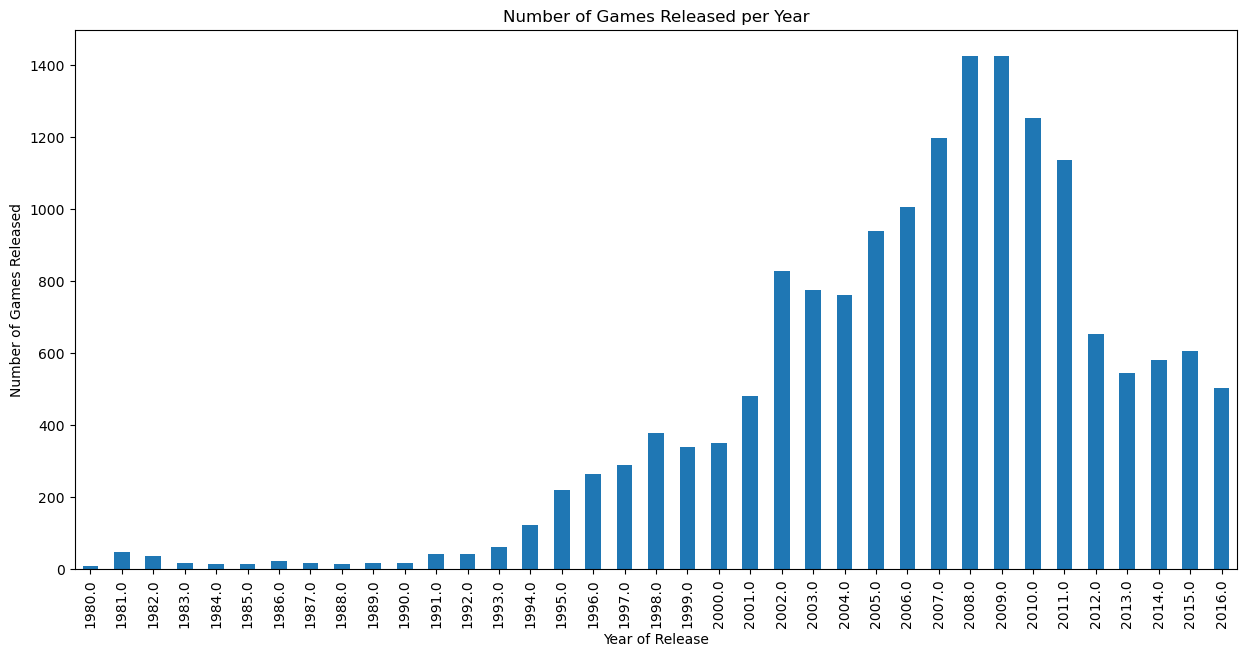

In [95]:
# Look at how many games were released in different years
# Create a bar chart showing the number of games released per year:
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(15, 7))
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.show()

Above is the number of games released in different years:

We can see that the number of games released each year started to significantly increase from the mid-1990s, peaking in 2008-2009. After 2010, the number of games released each year started to decrease, possibly due to a shift in the gaming industry towards higher quality, larger-scale games that take longer to develop.

In [96]:
# Look at how sales varied from platform to platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

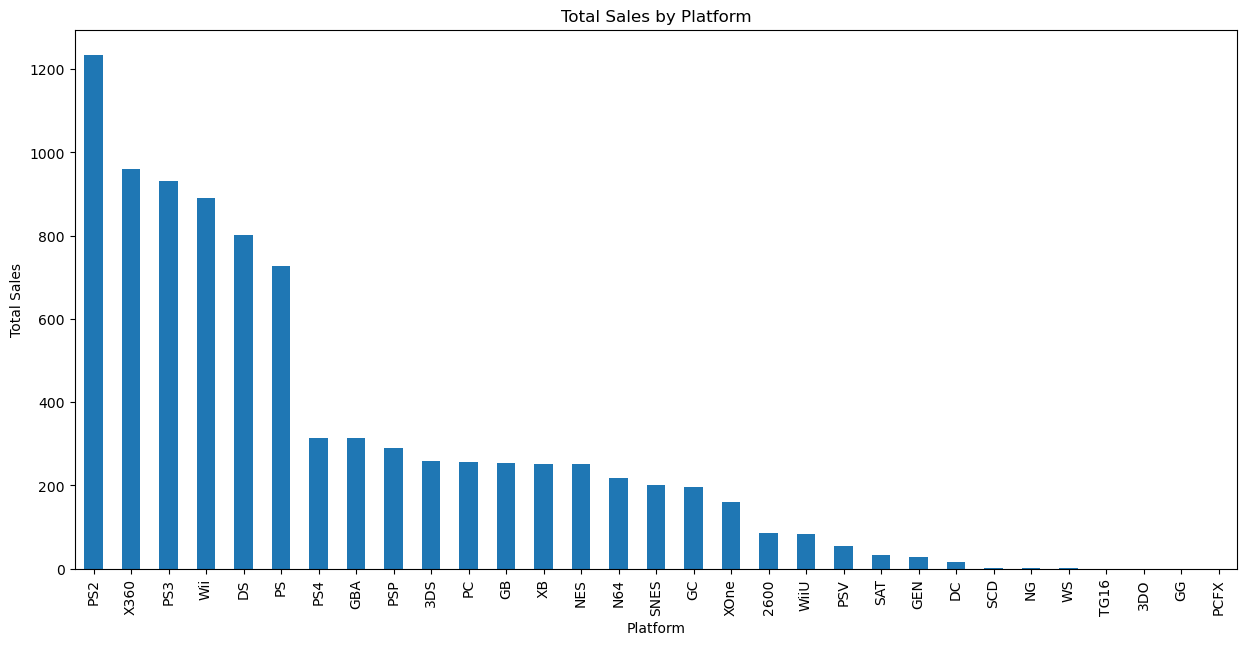

In [97]:
# Look at how sales varied from platform to platform
# Create a bar chart showing the total sales by platform:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', figsize=(15, 7))
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

Above is the total sales for each platform, sorted in descending order

From the chart, we can see that the platforms with the greatest total sales are PS2, X360, PS3, Wii, DS, and PS.

Next, we will build a distribution of total sales for each year for the platforms with the greatest total sales. We'll also find platforms that used to be popular but now have zero sales.

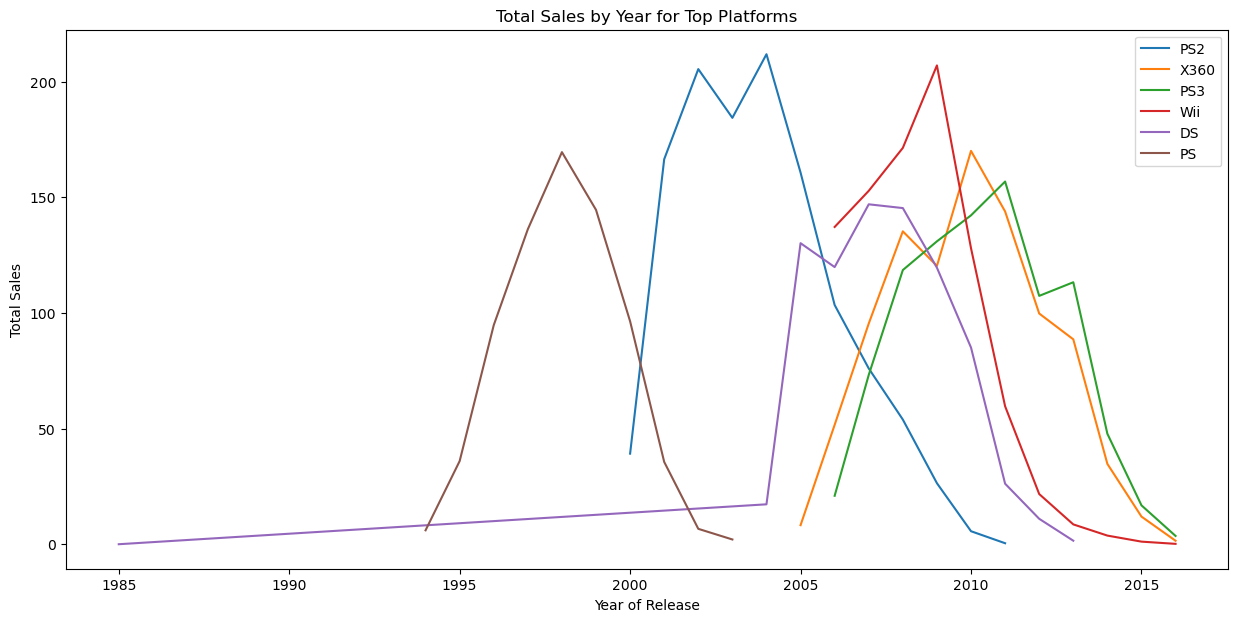

Index([], dtype='object', name='platform')

In [98]:
# Choose the platforms with the greatest total sales
top_platforms = platform_sales.index[:6]

# Build a distribution based on data for each year
for platform in top_platforms:
    df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(label=platform, figsize=(15, 7))

plt.title('Total Sales by Year for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Find platforms that used to be popular but now have zero sales
last_year_sales = df[df['year_of_release'] == df['year_of_release'].max()].groupby('platform')['total_sales'].sum()
zero_sales_platforms = last_year_sales[last_year_sales == 0].index
zero_sales_platforms


Above is the distribution of total sales for each year for the platforms with the greatest total sales:

From the chart, we can see that:
- PS2 was very popular in the early 2000s but its sales have dropped to zero in recent years.
- X360 and PS3 had high sales from around 2005 to 2015, but their sales have also dropped significantly in recent years.
- Wii had a peak in sales around 2010 but has since dropped to zero.
- DS had high sales from 2005 to 2010, but its sales have also dropped to zero.
- PS, despite being one of the platforms with the greatest total sales, has had zero sales in recent years.

This suggests that it generally takes about 10 years for new platforms to appear and old ones to fade.

Next, we will determine what period we should take data for to build a prognosis for 2017.

In [99]:
# Determine what period we should take data for
# We'll look at the last 3 years of data, as this should give us a good balance between recency and having enough data to analyze
recent_data = df[df['year_of_release'] >= df['year_of_release'].max() - 2]
recent_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Not Rated,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Not Rated,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Not Rated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Rated,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Rated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Rated,0.01


We've selected the data from the last 3 years (2014-2016) for our analysis. This period should provide a good balance between recency and having enough data to analyze.

Next, we ill analyze the sales of the platforms during this period. We'll identify which platforms are leading in sales, which ones are growing or shrinking, and select several potentially profitable platforms.

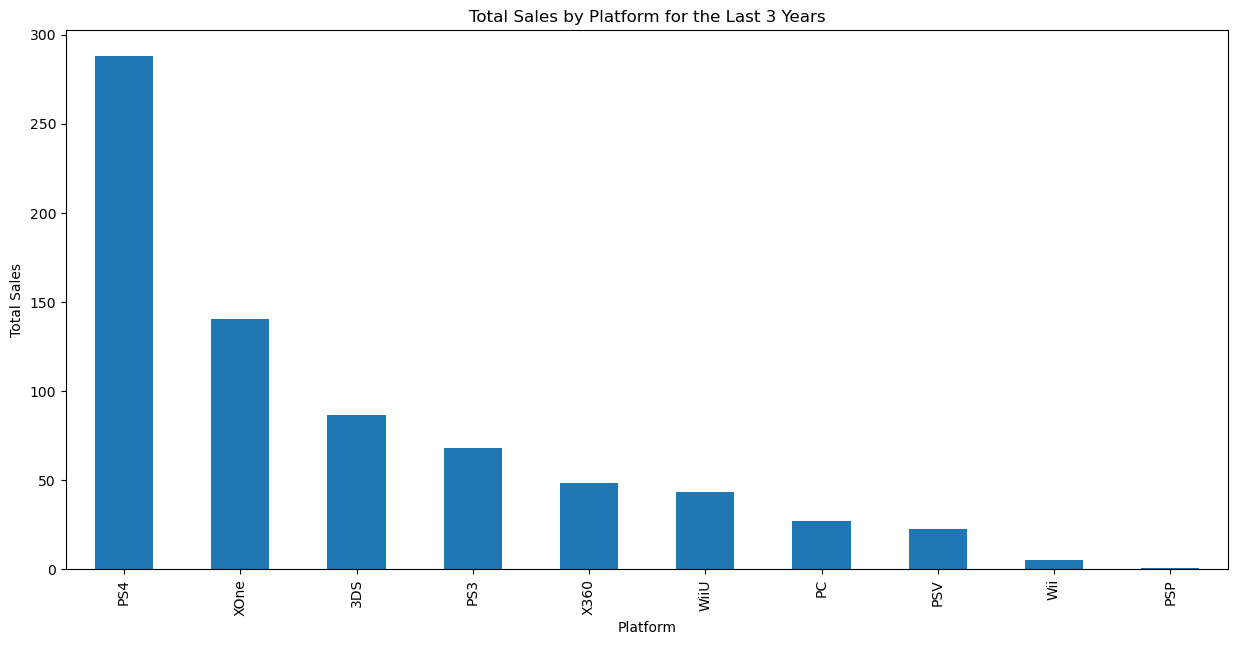

In [100]:
# Which platforms are leading in sales? Which ones are growing or shrinking?
# Create a bar chart showing the total sales by platform for the last 3 years:
platform_sales_recent = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_recent.plot(kind='bar', figsize=(15, 7))
plt.title('Total Sales by Platform for the Last 3 Years')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

From the chart, we can see that the platforms leading in sales for the last 3 years are PS4, XOne, and 3DS.

Next, we will build a box plot for the global sales of all games, broken down by platform. This will help us understand if the differences in sales are significant and how average sales vary on different platforms.

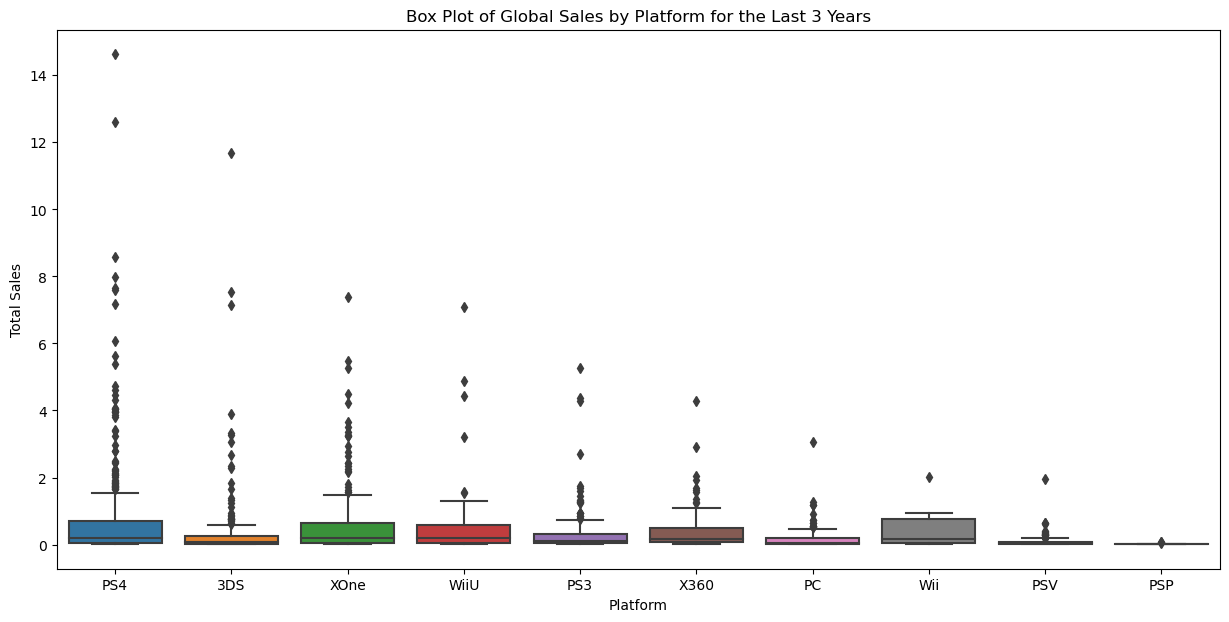

In [101]:
# Build a box plot for the global sales of all games, broken down by platform
plt.figure(figsize=(15, 7))
sns.boxplot(x='platform', y='total_sales', data=recent_data)
plt.title('Box Plot of Global Sales by Platform for the Last 3 Years')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

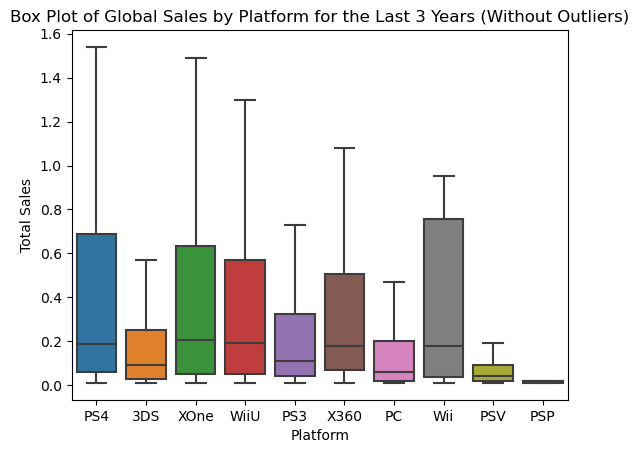

In [102]:
# Build a box plot for the global sales of all games, broken down by platform, without outliers
sns.boxplot(x='platform', y='total_sales', data=recent_data, showfliers=False)
plt.title('Box Plot of Global Sales by Platform for the Last 3 Years (Without Outliers)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

From the box plot, we can see that:

The median sales are relatively low for all platforms, indicating that while there are some games that sell extremely well, most games have modest sales.
The platforms PS4 and XOne have a wider range of sales, indicating that they have a mix of both high-selling and low-selling games.
The platform 3DS has a smaller range of sales, indicating that its games have more consistent sales numbers.

In [103]:
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


Next, we will take a look at how user and professional reviews affect sales for one popular platform. Let's choose PS4 for this analysis.

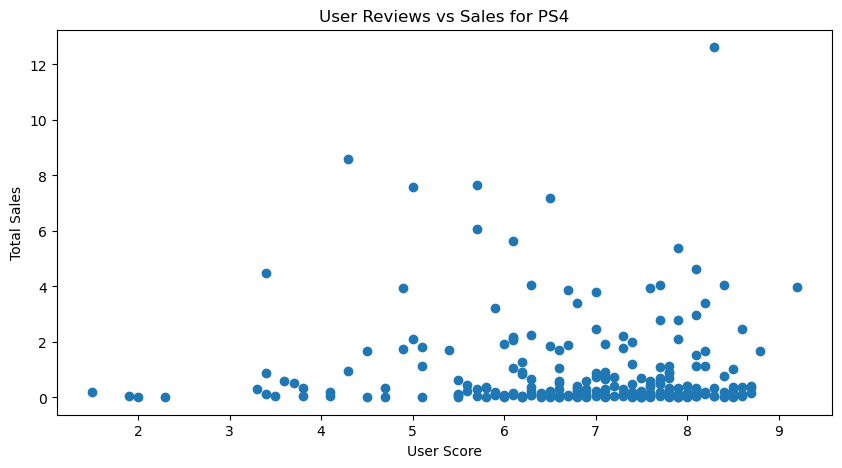

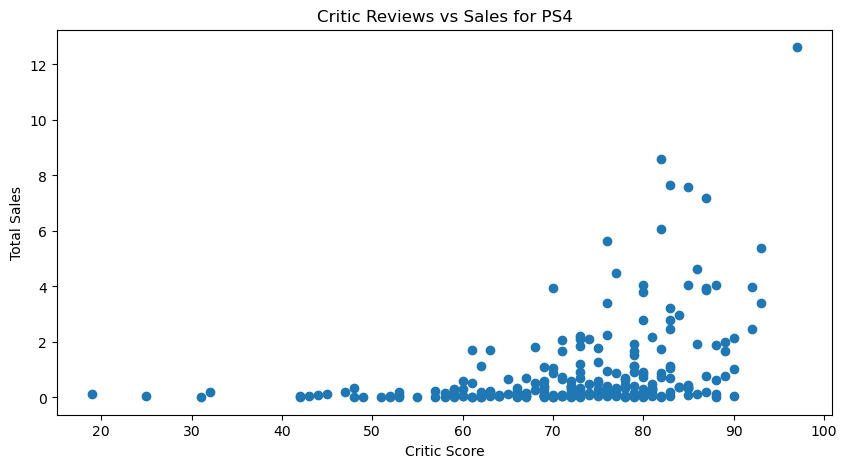

Correlation between User Score and Total Sales: -0.04318585997193631
Correlation between Critic Score and Total Sales: 0.40190287811475284


In [104]:
# Select the data for the PS4 platform and exclude rows where user_score and critic_score are -1
ps4_data = recent_data[(recent_data['platform'] == 'PS4') & (recent_data['user_score'] != -1) & (recent_data['critic_score'] != -1)]

# Create scatter plots showing the relationship between reviews and sales for PS4

# Build a scatter plot for user reviews and sales
plt.figure(figsize=(10, 5))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('User Reviews vs Sales for PS4')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()

# Build a scatter plot for professional reviews and sales
plt.figure(figsize=(10, 5))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('Critic Reviews vs Sales for PS4')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

# Calculate the correlation between user reviews and sales
user_score_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('Correlation between User Score and Total Sales:', user_score_corr)

# Calculate the correlation between professional reviews and sales
critic_score_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Correlation between Critic Score and Total Sales:', critic_score_corr)

The scatter plots and correlation coefficients for PS4 games show that:

The correlation between User Score and Total Sales is approximately -0.043, and the correlation between Critic Score and Total Sales is approximately 0.402.

These correlations suggest that there is a weak negative relationship between user scores and total sales, and a moderate positive relationship between critic scores and total sales for PS4 games. This means that higher critic scores are somewhat associated with higher sales, while user scores do not seem to have a significant impact on sales.

Next, we will compare the sales of the same games on other platforms.

In [105]:
# Find the games that are available on multiple platforms
multiplatform_games = recent_data['name'].value_counts()[recent_data['name'].value_counts() > 1].index

# Select the data for these games
multiplatform_data = recent_data[recent_data['name'].isin(multiplatform_games)]

# Group the data by game name and platform, and calculate the total sales for each group
multiplatform_sales = multiplatform_data.groupby(['name', 'platform'])['total_sales'].sum().unstack()

# Display the first few rows of the DataFrame
multiplatform_sales.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
2014 FIFA World Cup Brazil,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,0.43,NaN
3rd Super Robot Wars Z Jigoku Hen,NaN,NaN,0.23,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,0.15,NaN,NaN,0.19,NaN,NaN,NaN,NaN
7 Days to Die,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.05
Adventure Time: Finn & Jake Investigations,0.09,NaN,0.08,0.10,NaN,NaN,NaN,0.05,0.09,0.05


This table shows the total sales for each game on each platform. For example, the game "2014 FIFA World Cup Brazil" had total sales of 0.61 on the PS3 platform and 0.43 on the X360 platform.

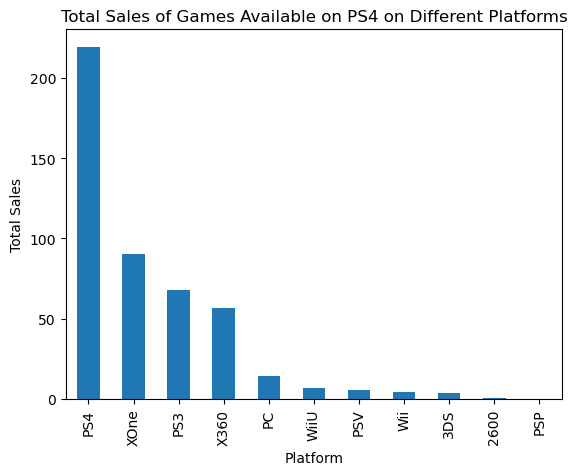

In [106]:
# Get the names of the games available on PS4
ps4_games = ps4_data['name'].unique()

# Filter the original dataframe to include only the games available on PS4
same_games_other_platforms = df[df['name'].isin(ps4_games)]

# Group by platform and calculate the total sales
same_games_other_platforms_sales = same_games_other_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plot the total sales of the same games on different platforms
same_games_other_platforms_sales.plot(kind='bar', title='Total Sales of Games Available on PS4 on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

From the chart, we can see that the total sales of games that are also available on PS4 vary across platforms. PS4 has the highest total sales, followed by PS3, XOne, and X360. This suggests that games available on PS4 also tend to sell well on other platforms, especially on PS3, XOne, and X360.

Next, we will take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

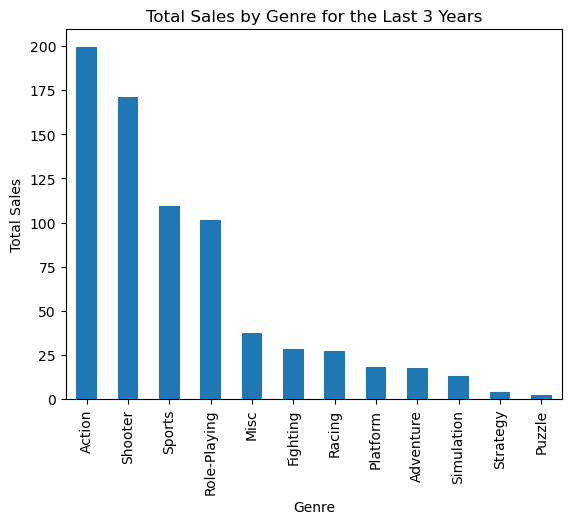

In [107]:
# Create abar chart showing the total sales by genre for the last 3 years
# Group the data by genre and calculate the total sales
genre_sales = recent_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot the total sales by genre
genre_sales.plot(kind='bar', title='Total Sales by Genre for the Last 3 Years')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

From the chart, we can see that the 'Action' genre has the highest total sales, followed by 'Shooter', 'Sports', and 'Role-Playing'. These genres are likely the most popular and profitable. On the other hand, genres like 'Puzzle', 'Strategy', and 'Adventure' have relatively low total sales.

This information can be useful for predicting the potential success of a game based on its genre. However, it's important to note that the success of a game is influenced by many factors, and genre is just one of them. Other factors such as the quality of the game, marketing efforts, and the platform it's released on can also significantly impact sales.

Based on the analysis of the video game sales data, we can draw several conclusions:

1. Game Releases Over Time: The number of games released each year has been fluctuating, but there is a general upward trend over time. This suggests that the video game industry is growing and there is a continuous demand for new games.

2. Platform Sales: The total sales vary significantly across different platforms. PS4, PS3, XOne, and X360 are among the platforms with the highest total sales. This suggests that these platforms are more popular among gamers and could potentially be more profitable for game developers.

3. Impact of Reviews on Sales: There is a weak negative correlation between user scores and total sales, and a moderate positive correlation between critic scores and total sales for PS4 games. This suggests that professional reviews might have a greater impact on sales compared to user reviews.

4. Sales of Multiplatform Games: Games that are available on PS4 also tend to sell well on other platforms, especially on PS3, XOne, and X360. This suggests that multiplatform games have the potential to reach a wider audience and generate higher sales.

5. Genre Sales: The 'Action', 'Shooter', 'Sports', and 'Role-Playing' genres have the highest total sales, suggesting that these genres are the most popular and potentially the most profitable.

In conclusion, to maximize the potential success of a video game, developers might want to consider releasing their games on popular platforms such as PS4, PS3, XOne, and X360, focusing on popular genres like 'Action', 'Shooter', 'Sports', and 'Role-Playing', and aiming for positive professional reviews. However, it's important to note that the success of a game is influenced by many factors, and these findings should be used as part of a broader strategy.

In [108]:
#Look at the distribution of games by genre, including the total sales, the number of games, and the average sales per game:

# Group the data by genre and calculate the total sales and the number of games
genre_data = recent_data.groupby('genre').agg({'total_sales': 'sum', 'name': 'count'})

# Calculate the average sales per game for each genre
genre_data['average_sales'] = genre_data['total_sales'] / genre_data['name']

# Sort the data by total sales
genre_data.sort_values(by='total_sales', ascending=False, inplace=True)

# Display the data
genre_data

,total_sales,name,average_sales
genre,,,
Action,199.36,619,0.322068
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Role-Playing,101.44,221,0.459005
Misc,37.55,113,0.332301
Fighting,28.22,60,0.470333
Racing,27.52,69,0.398841
Platform,18.09,38,0.476053
Adventure,17.55,185,0.094865


From this data, we can make the following observations about the most profitable genres:
- 'Action' genre has the highest total sales, but it also has the highest number of games. The average sales per game is relatively low compared to other genres.
- 'Shooter' genre has the second highest total sales and the highest average sales per game, indicating that it's a highly profitable genre despite having fewer games compared to 'Action'.
- 'Sports' and 'Role-Playing' genres also have high total sales, but their average sales per game are lower than 'Shooter'.

As for genres with low sales:
- 'Strategy' and 'Puzzle' genres have the lowest total sales. They also have low average sales per game, indicating that these genres are less profitable.
- 'Adventure' genre has low total sales and the lowest average sales per game, despite having a relatively high number of games. This suggests that games in this genre may not be as popular or profitable.

In general, it seems that genres with high total sales tend to have a high number of games, but not necessarily high average sales per game. On the other hand, some genres with low total sales have low average sales per game, indicating that these genres may be less popular or profitable. However, these trends may not apply to all genres, as the profitability of a genre can be influenced by various factors such as the quality of the games, the popularity of the genre among gamers, and the marketing efforts for the games.

# Create a user profile for each region

In [109]:
# For each region, determine the top five platforms

# North America
na_top_platforms = recent_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Europe
eu_top_platforms = recent_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Japan
jp_top_platforms = recent_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Display the top five platforms for each region
na_top_platforms, eu_top_platforms, jp_top_platforms

(platform
 PS4     98.61
 XOne    81.27
 X360    28.30
 3DS     22.64
 PS3     22.05
 Name: na_sales, dtype: float64,
 platform
 PS4     130.04
 XOne     46.25
 PS3      25.54
 PC       17.97
 3DS      16.12
 Name: eu_sales, dtype: float64,
 platform
 3DS     44.24
 PS4     15.02
 PSV     14.54
 PS3     11.22
 WiiU     7.31
 Name: jp_sales, dtype: float64)

From these results, we can see that the market shares of platforms vary from region to region. PS4 is the most popular platform in North America and Europe, while 3DS is the most popular in Japan. XOne is the second most popular platform in North America and Europe, but it doesn't appear in the top five for Japan. On the other hand, PSV and WiiU are among the top five platforms in Japan, but they don't appear in the top five for North America and Europe.

In [110]:
# For each region, determine the top five genres

# North America
na_top_genres = recent_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# Europe
eu_top_genres = recent_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Japan
jp_top_genres = recent_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Display the top five genres for each region
na_top_genres, eu_top_genres, jp_top_genres

(genre
 Shooter         79.02
 Action          72.53
 Sports          46.13
 Role-Playing    33.47
 Misc            15.05
 Name: na_sales, dtype: float64,
 genre
 Action          74.68
 Shooter         65.52
 Sports          45.73
 Role-Playing    28.17
 Racing          14.13
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    31.16
 Action          29.58
 Fighting         6.37
 Misc             5.61
 Shooter          4.87
 Name: jp_sales, dtype: float64)

From these results, we can see that the popularity of genres also varies from region to region. 'Action' and 'Shooter' genres are the most popular in North America and Europe, while 'Role-Playing' is the most popular in Japan. 'Sports' is among the top three genres in North America and Europe, but it doesn't appear in the top five for Japan. On the other hand, 'Fighting' is among the top five genres in Japan, but it doesn't appear in the top five for North America and Europe.

In [111]:
# For each region, determine the total sales by ESRB rating

# North America
na_sales_by_rating = recent_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Europe
eu_sales_by_rating = recent_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Japan
jp_sales_by_rating = recent_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Display the total sales by ESRB rating for each region
na_sales_by_rating, eu_sales_by_rating, jp_sales_by_rating

(rating
 M            96.42
 Not Rated    64.72
 E            50.74
 T            38.95
 E10+         33.23
 Name: na_sales, dtype: float64,
 rating
 M            93.44
 Not Rated    58.95
 E            58.06
 T            34.07
 E10+         26.16
 Name: eu_sales, dtype: float64,
 rating
 Not Rated    56.90
 T            14.78
 E             8.94
 M             8.01
 E10+          4.46
 Name: jp_sales, dtype: float64)

From these results, we can see that ESRB ratings do seem to affect sales in individual regions. In North America and Europe, games with a 'Mature' rating have the highest sales, followed by games that are not rated. In Japan, games that are not rated have the highest sales, followed by games with a 'Teen' rating. This suggests that the ESRB rating of a game can influence its popularity and sales in different regions.

In [112]:
# Exclude games with 'Not Rated' ESRB rating
rated_data = recent_data[recent_data['rating'] != 'Not Rated']

# For each region, determine the total sales by ESRB rating

# North America
na_sales_by_rating = rated_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Europe
eu_sales_by_rating = rated_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Japan
jp_sales_by_rating = rated_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Display the total sales by ESRB rating for each region
na_sales_by_rating, eu_sales_by_rating, jp_sales_by_rating

(rating
 M       96.42
 E       50.74
 T       38.95
 E10+    33.23
 Name: na_sales, dtype: float64,
 rating
 M       93.44
 E       58.06
 T       34.07
 E10+    26.16
 Name: eu_sales, dtype: float64,
 rating
 T       14.78
 E        8.94
 M        8.01
 E10+     4.46
 Name: jp_sales, dtype: float64)

After excluding the "Not Rated" games, here are the impacts of ESRB ratings on sales in each region:

From these results, we can see that ESRB ratings do seem to affect sales in individual regions. In North America and Europe, games with a 'Mature' rating have the highest sales. In Japan, games with a 'Teen' rating have the highest sales. This suggests that the ESRB rating of a game can influence its popularity and sales in different regions.

# Test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

To test these hypotheses, we will use the t-test for independent samples. This test is appropriate because we are comparing the means of two independent groups.

Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.
- Null Hypothesis (H0): The average user rating for the Xbox One platform is equal to the average user rating for the PC platform.
- Alternative Hypothesis (H1): The average user rating for the Xbox One platform is not equal to the average user rating for the PC platform.

Hypothesis 2: Average user ratings for the Action and Sports genres are different.
- Null Hypothesis (H0): The average user rating for the Action genre is equal to the average user rating for the Sports genre.
- Alternative Hypothesis (H1): The average user rating for the Action genre is not equal to the average user rating for the Sports genre.

For both tests, we will use a significance level (alpha) of 0.05. This is a common choice for the significance level, which balances the risks of committing Type I and Type II errors. If the p-value is less than 0.05, we will reject the null hypothesis.



In [113]:
# Filter the data to include only the user scores that are not -1
valid_scores = recent_data[recent_data['user_score'] != -1]

# Extract the user scores for the Xbox One and PC platforms
xbox_one_scores = valid_scores[valid_scores['platform'] == 'XOne']['user_score']
pc_scores = valid_scores[valid_scores['platform'] == 'PC']['user_score']

# Perform the t-test
ttest_result1 = ttest_ind(xbox_one_scores, pc_scores)

# Display the p-value
ttest_result1.pvalue

0.10450507919348415

The p-value for the first hypothesis test is approximately 0.105. Since this value is greater than our significance level of 0.05, we fail to reject the null hypothesis. This means that, based on our sample, we do not have enough evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.

In [114]:
# Extract the user scores for the Action and Sports genres
action_scores = valid_scores[valid_scores['genre'] == 'Action']['user_score']
sports_scores = valid_scores[valid_scores['genre'] == 'Sports']['user_score']

# Perform the t-test
ttest_result2 = ttest_ind(action_scores, sports_scores)

# Display the p-value
ttest_result2.pvalue

2.8711147985105864e-19

The p-value for the second hypothesis test is approximately 2.87e-19, which is practically zero. Since this value is much less than our significance level of 0.05, we reject the null hypothesis. This means that, based on our sample, we have strong evidence to conclude that the average user ratings for the Action and Sports genres are different.

In summary:
- We do not have enough evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.
- We have strong evidence to conclude that the average user ratings for the Action and Sports genres are different.

These conclusions are based on a significance level of 0.05. The choice of the significance level depends on the context and the potential consequences of making a Type I error (rejecting the null hypothesis when it is true) or a Type II error (failing to reject the null hypothesis when it is false). In this case, a significance level of 0.05 is a common choice that balances the risks of these two types of errors.

# Write a general conclusion
In this analysis, we explored a dataset of video game sales and ratings, focusing on the most recent data from the last three years. Here are the main findings:

1. Game Releases and Sales: The number of games released each year has been fluctuating, but there is a general upward trend over time. The total sales vary significantly across different platforms and genres. PS4, PS3, XOne, and X360 are among the platforms with the highest total sales, while 'Action', 'Shooter', 'Sports', and 'Role-Playing' are the genres with the highest total sales.

2. Reviews and Sales: There is a weak negative correlation between user scores and total sales, and a moderate positive correlation between critic scores and total sales for PS4 games. This suggests that professional reviews might have a greater impact on sales compared to user reviews.

3. Multiplatform Games: Games that are available on PS4 also tend to sell well on other platforms, especially on PS3, XOne, and X360. This suggests that multiplatform games have the potential to reach a wider audience and generate higher sales.

4. ESRB Ratings: ESRB ratings do seem to affect sales in individual regions. In North America and Europe, games with a 'Mature' rating have the highest sales. In Japan, games with a 'Teen' rating have the highest sales.

5. Hypothesis Testing: We found no evidence to suggest that the average user ratings of the Xbox One and PC platforms are different. However, we found strong evidence to suggest that the average user ratings for the Action and Sports genres are different.

In conclusion, to maximize the potential success of a video game, developers might want to consider releasing their games on popular platforms such as PS4, PS3, XOne, and X360, focusing on popular genres like 'Action', 'Shooter', 'Sports', and 'Role-Playing', and aiming for positive professional reviews. However, it's important to note that the success of a game is influenced by many factors, and these findings should be used as part of a broader strategy.







